In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from clustering_traditional import TraditionalClustering
from clustering_statistics import get_cluster_statistics
from clustering_word2vec import Word2VecModel

In [2]:
# An example how to perform traditional list-based clustering of semantic VFT

# create the clustering object
cl = TraditionalClustering()

# initialize by loading the animal word lists
cl.initialize_semantic_list(filename="../database/de/animal_categories.csv")

# read the words from a semantic VFT
testfile: str = "de/semantic.txt"
f = open(testfile)
words = f.readlines()
f.close()

# remove trailing \n from the words and convert to pd.DataFrame
words = list(map(lambda s:s.replace("\n", ""), words))
words = pd.DataFrame({"word":words})

# find clusters
words = cl.calculate_clusterids_semantic(words)

# print the output
display(words)

# analyze cluster characteristics
display(get_cluster_statistics(words))

# clean up
del cl, testfile, f, words


,word,cluster,category_before
0,Hase,NaN,
1,Igel,NaN,
2,Reh,NaN,
3,Löwe,NaN,
4,Bär,1.0,
5,Puma,1.0,North America
6,Tiger,1.0,Feline
7,Schwein,2.0,
8,Kuh,2.0,Farm
9,Hund,3.0,


{'mean': 3.2,
 'median': 3.0,
 'max': 4,
 'number_of_clusters': 5,
 'count_per_size': {3: 2, 2: 1, 4: 2}}

In [3]:
# An example how to perform traditional rule-based clustering of phonematic VFT

# create the clustering object
cl = TraditionalClustering()

# initialize by loading the list of phonematic word pairs
cl.initialize_phonematic_list(filename="../database/de/phonematic_pairs.csv")

# read the words from a semantic VFT
testfile: str = "de/phonematic.txt"
f = open(testfile)
words = f.readlines()
f.close()

# remove trailing \n from the words and convert to pd.DataFrame
words = list(map(lambda s:s.replace("\n", ""), words))
words = pd.DataFrame({"word":words})

# find clusters
words = cl.calculate_clusterids_phonematic(words)

# print the output
display(words)

# analyze cluster characteristics
display(get_cluster_statistics(words))

# clean up
del cl, testfile, f, words


,word,cluster
0,Schule,1.0
1,schießen,1.0
2,schwimmen,1.0
3,schalten,1.0
4,sausen,NaN
5,suchen,NaN
6,Salami,NaN
7,Sellerie,NaN
8,Salat,NaN
9,Senegal,NaN


{'mean': 3.0,
 'median': 3.0,
 'max': 4,
 'number_of_clusters': 2,
 'count_per_size': {4: 1, 2: 1}}

2022-11-04 13:51:09,878 : INFO : loading KeyedVectors object from /home/tom/SYNC/Klinik/WissenschaftlicheProjekte/Projekte/aktuell/VFT-Projekt/Python/word2vec/multilanguage/models/eswiki-20221020-pages-articles.kv
2022-11-04 13:51:10,261 : INFO : loading vectors from /home/tom/SYNC/Klinik/WissenschaftlicheProjekte/Projekte/aktuell/VFT-Projekt/Python/word2vec/multilanguage/models/eswiki-20221020-pages-articles.kv.vectors.npy with mmap=None
2022-11-04 13:51:10,829 : INFO : KeyedVectors lifecycle event {'fname': '/home/tom/SYNC/Klinik/WissenschaftlicheProjekte/Projekte/aktuell/VFT-Projekt/Python/word2vec/multilanguage/models/eswiki-20221020-pages-articles.kv', 'datetime': '2022-11-04T13:51:10.829212', 'gensim': '4.2.0', 'python': '3.10.8 (main, Oct 13 2022, 21:13:48) [GCC 12.2.0]', 'platform': 'Linux-5.15.74-3-MANJARO-x86_64-with-glibc2.36', 'event': 'loaded'}


,word,cluster,relatedness_before
0,Conejo,1.0,NaN
1,Erizo,1.0,0.512406
2,Ciervo,NaN,0.376242
3,León,NaN,0.200713
4,llevar,NaN,0.124097
5,puma,NaN,0.077700
6,Tigre,NaN,0.277783
7,Cerdo,2.0,0.229921
8,Vaca,2.0,0.457358
9,perro,3.0,0.373291


{'mean': 3.0,
 'median': 2.5,
 'max': 5,
 'number_of_clusters': 4,
 'count_per_size': {2: 2, 5: 1, 3: 1}}

'mean sequential relatedness: 0.3869285517755677'

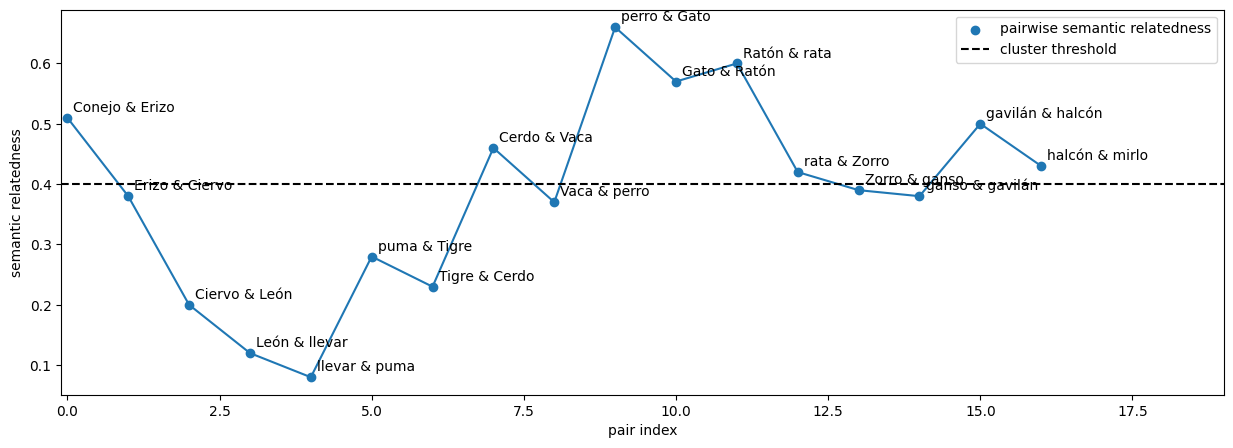

In [4]:
# An example how to perform word2vec-based clustering; you MUST replace the file name for the model.load_wv line with a correct model file!

# create and initialize the Word2Vec Model
Word2VecModel.set_logging_info()
model = Word2VecModel()
# model.load_wv("/home/tom/SYNC/Klinik/WissenschaftlicheProjekte/Projekte/aktuell/VFT-Projekt/Python/word2vec/models/wiki_ger_latest_wvonly.kv")
model.load_wv("/home/tom/SYNC/Klinik/WissenschaftlicheProjekte/Projekte/aktuell/VFT-Projekt/Python/word2vec/multilanguage/models/eswiki-20221020-pages-articles.kv")

# semantic relatedness threshold used for identifying clusters, use threshold 0.4 for semantic VFT and 0.3 for phonematic VFT
threshold = 0.4

# read the words from a semantic VFT
testfile: str = "es/semantic.txt"
f = open(testfile)
words = f.readlines()
f.close()

# remove trailing \n from the words and convert to pd.DataFrame
words = list(map(lambda s:s.replace("\n", ""), words))
words = pd.DataFrame({"word":words})

# find clusters
words["cluster"], words["relatedness_before"] = model.calculate_clusterids(words, clustering_type="fixed_chain", sim_threshold=threshold)

# print the output
display(words)

# analyze cluster characteristics
display(get_cluster_statistics(words))
display("mean sequential relatedness: " + str(model.calculate_mean_seqrel_total(words["word"])))

# plot the pairwise semantic relatedness
# create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15,5))

# create a DataFrame which stores all word pairs with their semantic relatedness
pairs = pd.DataFrame(columns=["pair", "cosine"])
for i in range(0, words.shape[0]-1):
    word1 = words.loc[i, "word"]
    word2 = words.loc[i+1, "word"]
    pairs = pd.concat([pairs, pd.DataFrame({"pair":[word1 + " & " + word2], "cosine":[round(model.cosine_similarity(word1, word2),2)]})])
pairs.reset_index(inplace=True)

# now plot as scatter + line
ax.scatter(x=pairs.index, y=pairs["cosine"], label="pairwise semantic relatedness")
ax.plot(pairs.index, pairs["cosine"])

# horizontal line for clustering threshold
ax.hlines(threshold, -0.1, words.index.max() + 2, colors="black", linestyles="dashed", label="cluster threshold")

# some formatting
ax.set_xlim(-0.1, words.index.max() + 2)
ax.set_ylabel("semantic relatedness")
ax.set_xlabel("pair index")
ax.legend()

# annotate the plot with all words
for i in pairs.index:
    ax.annotate(text=pairs.loc[i, "pair"], xy=(pairs.index[i] + 0.1, pairs.loc[i, "cosine"] + 0.01), color="black")

# clean up
del model.model.wv, model.model, model, testfile, f, words, fig, ax, pairs, word1, word2, i, threshold
